<a href="https://colab.research.google.com/github/shanakiyu/2024-projet-final-VIVIERBARTE-NINA/blob/main/2024_projet_final_vivierbarte_nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Est-ce que les pays les plus heureux ont plus de mots pour exprimer le bonheur ?**


# **1. INTRODUCTION**

Avec l'essor des études sur le bien-être et la qualité de vie, **le bonheur** est devenu un sujet d'intérêt central en sciences sociales. Indicateur universellement recherché, il est mesuré à l’échelle mondiale par des outils comme **le World Happiness Index**, qui classent les pays en fonction de facteurs tels que le revenu, la santé, ou le soutien social. Mais cette mesure quantifiée du bonheur pose une question intrigante : les pays dits "les plus heureux" accordent-ils, dans leur culture, une importance particulière au bonheur ? Et cette importance se reflète-t-elle dans leur langue ?

La linguistique cognitive propose que le langage structure et influence notre vision du monde. À travers les mots que nous utilisons, nous priorisons certains concepts et leur accordons une place particulière dans nos pensées. **Ainsi, les pays considérés comme les plus heureux possèdent-ils un plus grand nombre de termes pour exprimer le concept de bonheur ?**

**Prédiction :**

**P1 :** les pays avec des scores de bonheur élevés auront une richesse lexicale plus grande pour exprimer le concept de bonheur dans leurs langues.

***Note importante***
⚠️ Une partie du code utilisé dans ce projet a été générée à l’aide de l’intelligence artificielle ChatGPT.

# **2. LIBRARY IMPORT**

In [ ]:
import pandas as pd  # Pandas pour manipuler des dataframes
from tqdm.auto import tqdm  # tqdm pour afficher une barre de progression lors de boucles longues
import matplotlib.pyplot as plt  # Matplotlib pour créer des graphiques et visualisations
import seaborn as sns  # Seaborn pour des visualisations plus stylées
import numpy as np  # NumPy pour les calculs mathématiques et manipulation de tableaux numériques
import requests  # Permet d'envoyer des requêtes HTTP pour récupérer des données depuis Internet
from scipy import stats  # SciPy pour effectuer des tests statistiques et des analyses
from scipy.stats import pearsonr  # Pearsonr pour calculer des corrélations
from google.colab import files  # Utilisation des outils Colab pour importer ou exporter des fichiers
import io  # Utile pour lire des fichiers

# Configuration du style des graphiques avec Seaborn
sns.set(context='paper', style='ticks',
        font_scale=1, palette='colorblind')

# **3. DATA**


## **3.1. Importation de data depuis Lexibank**


Nous allons importer un dataset provenant de Lexibank et sélectionner uniquement les termes associés aux concepts de "happiness" et "joy". Ensuite, nous calculerons le nombre total de termes utilisés pour exprimer le bonheur par langue, avant d'associer chaque Glottocode à son nom correspondant.

In [ ]:
# Chargement d'un fichier CSV directement depuis une URL hébergée sur GitHub
all_lexibank = pd.read_csv('https://github.com/alexeykosh/intro-to-ling/raw/refs/heads/main/S8/lexibank_clipped.csv',
                           low_memory=False, index_col=0)

# On affiche les cinq premières lignes du DataFrame pour avoir un aperçu des données
all_lexibank.head(5)

,Language_ID,Form,Latitude,Longitude,Glottocode,Concepticon_Gloss,Family
0,aaleykusunda-KusundaK,ɐ̃ː.ʤi,28.000000,82.260000,kusu1250,ABOVE,NaN
1,abrahammonpa-MonpaKalaktang,thuŋga,27.104162,92.113017,kala1376,ABOVE,Sino-Tibetan
2,abrahammonpa-MonpaDirang,thuŋga,27.349590,92.279140,tsha1245,ABOVE,Sino-Tibetan
3,abrahammonpa-MonpaChangprong,jur,27.578928,91.876393,dakp1242,ABOVE,Sino-Tibetan
4,abrahammonpa-SartangDarbuB,khuŋlo,27.329171,92.358727,sart1249,ABOVE,Sino-Tibetan


In [ ]:
# On définit une liste des termes associés au concept de bonheur
terms_for_Happiness = [
    "HAPPINESS", "JOY"
]

# On sélectionne les colonnes pertinentes du DataFrame all_lexibank pour notre analyse
all_lexibank = all_lexibank[['Form', 'Concepticon_Gloss', 'Glottocode', 'Family']]

# Extraire uniquement les lignes où le Concepticon_Gloss correspond aux termes pour HAPPINESS et JOY
subset_si = all_lexibank.query(f'Concepticon_Gloss in {terms_for_Happiness}')
subset_si.head(5)

,Form,Concepticon_Gloss,Glottocode,Family
660545,quɑnəʃ,JOY,kaza1248,Turkic
660546,sʊjənəʃ,JOY,kaza1248,Turkic
660547,ʃɑtdumɑn,JOY,kaza1248,Turkic
660548,quɑnəʃtələq,JOY,kaza1248,Turkic
660549,n̪əlɪʋu,JOY,nucl1305,Dravidian


In [ ]:
# On initialise une liste vide pour stocker les données des langues où colexification existe
lang_colex = []

# On parcourt chaque glottocode unique dans le sous-ensemble subset_si
for glottocode in subset_si.Glottocode.unique():
    # On filtre les données pour obtenir uniquement les entrées correspondant au glottocode actuel
    data_lg = subset_si.query(f'Glottocode == "{glottocode}"')

    # On vérifie si le nombre de concepts uniques (HAPPINESS, JOY) est supérieur ou égal à 2
    if data_lg.Concepticon_Gloss.nunique() >= 2:
        # On ajoute le glottocode et le nombre de formes uniques associées à ce glottocode dans la liste
        lang_colex.append([glottocode, len(data_lg.Form.unique())])

# On convertit la liste lang_colex en un DataFrame
df_colex = pd.DataFrame(lang_colex)

# On nomme les colonnes du DataFrame
df_colex.columns = ['glottocode', 'Number_of_terms']

# On configure les options d'affichage pour montrer un aperçu des données (5 premières et dernières lignes)
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_colex)


,glottocode,Number_of_terms
0,kaza1248,6
1,nucl1305,2
2,mala1464,3
3,tami1289,2
4,telu1262,1
...,...,...
90,lezg1247,2
91,darg1241,3
92,chec1245,3
93,stan1318,3


In [ ]:
# Chargement des données Glottolog depuis un fichier CSV hébergé sur GitHub
glottolog = pd.read_csv('https://raw.githubusercontent.com/alexeykosh/intro-to-ling/refs/heads/main/S8/glottolog.csv')
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(glottolog)


,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
...,...,...,...,...,...,...,...
21952,zuwa1238,Zuwadza,NaN,dialect,Papunesia,NaN,NaN
21953,zwal1238,Zwall,NaN,dialect,Africa,NaN,NaN
21954,zyph1238,Zyphe,zyp,language,Eurasia,22.52400,93.2640
21955,zyud1238,Zyuzdin,NaN,dialect,Eurasia,NaN,NaN


In [ ]:
# On fusionne des données entre df_colex et glottolog pour ajouter les noms des langues
merged_df = pd.merge(df_colex, glottolog[["glottocode", "name"]], on="glottocode", how="left")

# On remplace manuellement des noms manquants avec un dictionnaire
missing_names = {
    "osse1243": "Ossetian",
    "alba1267": "Albanian",
    "buri1258": "Buriat"
}

# On corrige les noms manquants en utilisant une fonction lambda
merged_df['name'] = merged_df.apply(
    lambda row: missing_names[row['glottocode']] if pd.isnull(row['name']) and row['glottocode'] in missing_names else row['name'],
    axis=1
)

# Résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(merged_df)

,glottocode,Number_of_terms,name
0,kaza1248,6,Kazakh
1,nucl1305,2,Kannada
2,mala1464,3,Malayalam
3,tami1289,2,Tamil
4,telu1262,1,Telugu
...,...,...,...
90,lezg1247,2,Lezgian
91,darg1241,3,North-Central Dargwa
92,chec1245,3,Chechen
93,stan1318,3,Standard Arabic


## **3.2. Importation de data depuis World Happiness Index**

Nous allons importer un dataset sur l'indice de bonheur mondial de 2013 à 2023. L'idée est de calculer la moyenne de l'indice de bonheur pour chaque pays sur cette période, afin d'obtenir une mesure plus représentative du bonheur global, plutôt que de se baser sur l'indice d'une seule année

In [ ]:
# Merci de télécharger un fichier local : World Happiness Index by Reports 2013-2023 no nulls.csv
# Disponible dans le repository GitHub : 2024-projet-final-VIVIERBARTE-NINA
uploaded = files.upload()

Saving World Happiness Index by Reports 2013-2023 no nulls.csv to World Happiness Index by Reports 2013-2023 no nulls.csv


In [ ]:
# On charge le fichier CSV téléchargé dans un DataFrame et on l'affiche
df = pd.read_csv(io.BytesIO(uploaded['World Happiness Index by Reports 2013-2023 no nulls.csv']))
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df)

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145
...,...,...,...,...
1518,Zimbabwe,2019,3.663,146
1519,Zimbabwe,2020,3.299,151
1520,Zimbabwe,2021,3.145,148
1521,Zimbabwe,2022,2.995,144


In [ ]:
# On calcule le score de bonheur moyen pour chaque pays (2013-2023)
df_mean = (
    df.groupby("Country")["Index"]
    .mean()
    .reset_index()
    .rename(columns={"Index": "Average Happiness Score (2013-2023)"})
)

# On affiche le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_mean)

,Country,Average Happiness Score (2013-2023)
0,Afghanistan,3.095700
1,Albania,4.958900
2,Algeria,5.410300
3,Angola,4.215600
4,Argentina,6.275400
...,...,...
162,Venezuela,5.477700
163,Vietnam,5.331800
164,Yemen,3.729444
165,Zambia,4.350200


## **3.3. Importation de data sur les pays avec leurs langues**


Nous allons importer un dataset sur les pays du monde et les langues qui y sont parlées. Ensuite, nous filtrerons uniquement les langues présentes dans nos données linguistiques.

In [ ]:
# Merci de télécharger un fichier local : countries-languages.csv
# Disponible dans le repository GitHub : 2024-projet-final-VIVIERBARTE-NINA
uploaded = files.upload()

Saving countries-languages.csv to countries-languages.csv


In [ ]:
# On charge le fichier CSV téléchargé dans un DataFrame
df_langcountry = pd.read_csv(io.BytesIO(uploaded['countries-languages.csv']), delimiter=",", quotechar='"', skipinitialspace=True)

# On sépare la colonne "Country" et "Languages Spoken" à partir de la virgule
df_langcountry[["Country", "Languages Spoken"]] = df_langcountry["Country"].str.split(",", n=1, expand=True)

# On nettoie des colonnes pour supprimer les guillemets
df_langcountry["Country"] = df_langcountry["Country"].str.strip('"') # dans la colonne "country"
df_langcountry["Languages Spoken"] = df_langcountry["Languages Spoken"].str.strip('"') # dans la colonne "Languages Spoken"
# On enlève la colonne "Languages Spoken"
df_langcountry = df_langcountry.drop(columns=["Languages Spoken;"])
# On nettoie des points-virgules à la fin de la colonne "Languages Spoken"
df_langcountry["Languages Spoken"] = df_langcountry["Languages Spoken"].str.rstrip('";').str.strip()

# On affiche le DataFrame
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_langcountry)


,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu, Turkic, Northern Pashto,..."
1,Albania,"Albanian, Greek"
2,Algeria,"Arabic, French, Standard Arabic"
3,Andorra,"Catalan, French, Castilian, Portuguese"
4,Angola,"Portuguese, Bantu"
...,...,...
193,Vietnam,Vietnamese
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Standard Arabic
196,Zambia,"English, Bemba, Kaonda, Lozi, Lunda, Luvale, N..."


In [ ]:
# On crée une fonction pour associer les langues à chaque pays
def find_languages_for_country(country_name):
    # On récupère les langues du pays dans la colonne 'Languages Spoken'
    country_row = df_langcountry[df_langcountry['Country'] == country_name] # On sélectionne la ligne correspondant à ce pays
    if not country_row.empty:                                               # On vérifie si le pays existe dans le DataFrame
        country_languages = country_row['Languages Spoken'].values[0]                  # On extrait la liste des langues
        country_languages = [lang.strip() for lang in country_languages.split(",")]    # On sépare les langues en une liste et nettoyer les espaces

        # On vérifie les langues du df_colex et les associer si elles sont présentes dans 'Languages Spoken'
        languages_in_country = [lang for lang in merged_df['name'] if lang.lower() in [l.lower() for l in country_languages]]
        return languages_in_country
    return []

# On applique cette fonction à chaque pays dans df_langcountry pour obtenir les langues associées
df_langcountry['Languages_in_Country'] = df_langcountry['Country'].apply(find_languages_for_country)

# On affiche le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_langcountry)


,Country,Languages Spoken,Languages_in_Country
0,Afghanistan,"Dari Persian, Pashtu, Turkic, Northern Pashto,...","[Northern Pashto, Northern Uzbek]"
1,Albania,"Albanian, Greek",[Albanian]
2,Algeria,"Arabic, French, Standard Arabic","[French, Standard Arabic]"
3,Andorra,"Catalan, French, Castilian, Portuguese","[Catalan, French, Portuguese]"
4,Angola,"Portuguese, Bantu",[Portuguese]
...,...,...,...
193,Vietnam,Vietnamese,[]
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic",[]
195,Yemen,Standard Arabic,[Standard Arabic]
196,Zambia,"English, Bemba, Kaonda, Lozi, Lunda, Luvale, N...",[]


## **3.4. Concaténation du dataset sur les langues des pays et celui du happiness score**

Nous allons maintenant concaténer les deux datasets précédents en fonction des pays du monde : celui contenant les langues parlées dans chaque pays et celui contenant les scores de bonheur des pays.

In [ ]:
# On uniformise les noms de pays (en minuscules) dans les deux datasets à concaténer
df_langcountry['Country'] = df_langcountry['Country'].str.strip().str.lower()
df_mean['Country'] = df_mean['Country'].str.strip().str.lower()

# On merge le dataset df_langcountry et le datset df_mean sur la colonne "Country"
final_df = pd.merge(df_langcountry, df_mean, on='Country', how='left')

# On ajoute la colonne 'Languages_in_Country' à partir de df_langcountry si elle n'est pas déjà dans final_df
if 'Languages_in_Country' not in final_df.columns:
    final_df['Languages_in_Country'] = df_langcountry.set_index('Country').reindex(final_df['Country'])['Languages_in_Country'].values

# On garde uniquement les pays présents dans df_mean
final_df = final_df[final_df['Average Happiness Score (2013-2023)'].notna()]

# On supprime les lignes où la colonne 'Languages_in_Country' est une liste vide
final_df = final_df[final_df['Languages_in_Country'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)]

# On supprime la colonne "Languages Spoken" si elle existe
if 'Languages Spoken' in final_df.columns:
    final_df = final_df.drop(columns=['Languages Spoken'])

# Afficher le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(final_df)



,Country,Languages_in_Country,Average Happiness Score (2013-2023)
0,afghanistan,"[Northern Pashto, Northern Uzbek]",3.095700
1,albania,[Albanian],4.958900
2,algeria,"[French, Standard Arabic]",5.410300
4,angola,[Portuguese],4.215600
6,argentina,"[Spanish, German, French, Italian]",6.275400
...,...,...,...
187,united states,[Spanish],6.983800
188,uruguay,[Spanish],6.435000
189,uzbekistan,"[Russian, Northern Uzbek]",6.036800
192,venezuela,[Spanish],5.477700


## **3.5. Création du dataset final**


Nous allons commencer par attribuer un coefficient personnalisé à chaque langue dans chaque pays en fonction du nombre de locuteurs de cette langue, en tenant compte de la population totale du pays. Ensuite, à partir de ce coefficient, nous calculerons le nombre moyen de termes utilisés pour exprimer le bonheur dans chaque pays. Cela nous permettra d'obtenir notre dataset final, incluant le nom des pays, leur score de bonheur moyen, ainsi que le nombre moyen de termes pour exprimer le bonheur.

In [ ]:
# Dictionnaire des coefficients des langues sur lesquelles on a des données par pays
# Choix manuel du coefficient en fonction du nombre de locuteurs dans le pays
coefficients_par_pays = {
    'afghanistan' : {'northern pashto' : 0.04, 'northern uzbek' : 0.1},
    'albania' : {'albanian' : 0.89},
    'algeria' : {'french' : 0.33, 'standard arabic': 0.8},
    'angola' : {'portuguese' : 0.7},
    'argentina' : {'spanish' : 0.9, 'german' : 0.02, 'french' : 0.01, 'italian' : 0.04},
    'armenia' : { 'russian' : 0.78, 'eastern armenian' : 0.98, 'northern kurdish' : 0.07},
    'austria' : {'german': 0.89, 'hungarian' : 0.01, 'slovenian' : 0.5},
    'azerbaijan' : {'russian' : 0.01, 'northern kurdish' : 0.0007, 'north azerbaijani' : 0.92, 'avar' : 0.005, 'lezgian' : 0.1},
    'belarus' : {'russian' : 0.42, 'belarusian' : 0.53},
    'belgium' : {'german' : 0.1, 'french' : 0.41},
    'belize' : {'spanish' : 0.56},
    'benin' : {'french' : 0.35},
    'bolivia' : {'spanish' : 0.93},
    'brazil' : {'spanish' : 0.3 , 'french' : 0.01, 'portuguese' : 0.93},
    'bulgaria' : {'turkish': 0.09, 'bulgarian' : 0.85},
    'burkina faso' : {'french' : 0.01},
    'burundi' : {'french' : 0.12},
    'cambodia' : {'french' : 0},
    'cameroon' : {'french' : 0.83},
    'canada' : {'french' : 0.2},
    'central african republic' : {'french' : 0.24},
    'chad' : {'french' : 0.13, 'standard arabic': 0.02},
    'chile' : {'spanish' : 0.93},
    'china' : {'evenki': 0.01, 'manchu' : 0, 'nanai' : 0},
    'colombia': {'spanish' : 0.99},
    'comoros' : {'french' : 0.26, 'standard arabic': 0.4},
    'costa rica' : {'spanish' : 0.9},
    'croatia' : {'croatian standard' : 0.96},
    'cyprus' : {'modern greek' : 0.8, 'turkish' : 0.18},
    'denmark' : {'german' : 0.4, 'danish' : 0.92, 'kalaallisut' : 0.01},
    'djibouti' : {'french' : 0.5},
    'ecuador' : {'spanish' : 0.8},
    'egypt' : {'french' : 0.01, 'standard arabic': 0.7},
    'el salvador' : {'spanish' : 0.92},
    'estonia' : {'russian' : 0.30, 'estonian' : 0.69},
    'ethiopia' : {'standard arabic' : 0},
    'finland' : {'swedish' : 0.05, 'finnish' : 0.84, 'karelian' : 0, 'livvi' : 0, 'north saami' : 0, 'inari saami' : 0, 'skolt saami' : 0},
    'france' : {'breton' : 0.03, 'catalan' : 0.0004, 'french' : 0.9, 'basque' : 0.0004},
    'gabon' : {'french' : 0.8},
    'georgia' : {'russian' : 0.01, 'eastern armenian' : 0.04, 'georgian' : 0.88, 'ossetian' : 0, 'north azerbaijani' : 0.06, 'abkhaz' : 0},
    'greece' : {'modern greek' : 0.87},
    'guatemala' : {'spanish' : 0.69},
    'guinea' : {'french' : 0.2},
    'haiti' : {'french' : 0.2},
    'honduras' : {'spanish' :0.91},
    'hungary' : {'hungarian' : 0.99},
    'iceland': {'icelandic' : 0.97},
    'india' : {'kannada' : 0.04, 'malayalam' : 0.03, 'tamil' : 0.06, 'telugu' : 0.07, 'bengali' : 0.08, 'hindi' : 0.41},
    'iran': {'turkish' : 0.02, 'western farsi' : 0.01, 'northern kurdish' : 0.07, 'standard arabic' : 0.02},
    'iraq' : {'northern kurdish' : 0.22, 'north azerbaijani' : 0.06, 'standard arabic' : 0.65},
    'ireland' : {'irish' : 0.41},
    'israel': {'modern hebrew' : 0.5},
    'italy' : {'italian' : 0.95},
    'jordan': {'adyghe' : 0.02, 'standard arabic' : 0.96},
    'kazakhstan' : {'kazakh' : 0.62, 'russian' : 0.23},
    'south korea' : {'korean' : 0.96},
    'kosovo' : {'turkish' : 0.04, 'albanian' : 0.92},
    'kuwait' : {'standard arabic' : 1},
    'kyrgyzstan' : {'russian' : 0.48},
    'laos': {'french' : 0.03},
    'latvia': {'russian' : 0.37, 'liv': 0, 'lithuanian': 0.01, 'latvian' : 0.62},
    'lebanon': {'french' : 0.45, 'standard arabic' : 0.95},
    'libya' : {'italian' : 0.02, 'standard arabic' : 0.90},
    'lithuania': {'russian' : 0.07, 'polish' : 0.05, 'lithuanian': 0.85},
    'luxembourg': {'german' : 0.45, 'french' : 0.70},
    'madagascar': {'french' : 0.26},
    'malaysian': {'malayalam' : 0.01, 'tamil' : 0.14, 'telugu': 0.01},
    'mali': {'french' : 0.25},
    'mauritania': {'french' : 0.20},
    'mexico': {'spanish' : 0.87},
    'moldova': {'russian' : 0.11},
    'mongolia': {'halh mongolian' : 0.78, 'buriat': 0.02, 'oirad-kalmyk-darkhat': 0, 'evenki' : 0.01},
    'morocco' : {'french' : 0.34, 'standard arabic' : 0.84},
    'namibia': {'german' : 0.01},
    'niger': {'french' : 0.2},
    'norway': {'south saami' : 0, 'lule saami': 0, 'north saami': 0, 'norwegian' : 0.87},
    'oman': {'standard arabic' : 0.58},
    'pakistan': {'burushaski' : 0, 'northern pashto' : 0.18},
    'panama': {'spanish' : 0.75},
    'paraguay': {'spanish' : 0.74},
    'peru': {'spanish' : 0.81},
    'portugal': {'portuguese' : 0.95},
    'qatar': {'standard arabic' : 0.98},
    'romania': {'german' : 0.07, 'hungarian' : 0.06},
    'russia' : {'russian' : 0.80, 'eastern armenian' : 0.001, 'adyghe' : 0.0003, 'veps' : 0.0001, 'western mari' : 0.001, 'eastern mari' : 0.001, 'moshka' : 0, 'erzya' : 0, 'udmurt' : 0.001, 'komi-permyak' : 0.001, 'komi-zyrian' : 0.001, 'kazym-berezover-suryskarer khanty' : 0, 'northern mansi' : 0, 'selkup' : 0, 'tundra nenets' : 0, 'forest enets' : 0, 'nganasan' : 0,
                'ossetian' : 1, 'bashkir' : 0.01, 'tatar' : 0.038, 'chuvash' : 0.01, 'buriat' : 0, 'evenki' : 0, 'nanai' : 0.0001, 'northern yukaghir' : 0, 'chukchi' : 0.0001, 'aleut' : 0, 'central siberian yupik' : 0, 'tsez' : 0, 'lak' : 0, 'lezgian' : 0, 'north-central dargwa' : 0, 'chechen': 0.01 },
    'rwanda': {'french' : 0.11},
    'senegal': {'french' : 0.37},
    'serbia': {'hungarian' : 0.03, 'slovak' : 0.02},
    'singapore': {'tamil': 0.03},
    'slovakia': {'hungarian' : 0.09, 'slovak' : 0.79, 'ukrainian': 0.02},
    'slovenia': {'slovenian' : 0.93},
    'somalia': {'italian' : 0.01},
    'south sudan': {'standard arabic' : 0.54},
    'spain': {'spanish': 0.98, 'catalan': 0.008, 'basque': 0.002},
    'sri lanka': {'tamil' : 0.29},
    'sudan': {'standard arabic' : 0.81},
    'sweden': {'swedish' : 0.93, 'south saami' : 0.0001, 'lule saami': 0.0001, 'north saami': 0.0001},
    'switzerland': {'german': 0.62, 'french': 0.23, 'italian': 0.08},
    'syria': {'adyghe': 0.0002, 'northern kurdish': 0.08, 'standard arabic': 0.88},
    'tajikistan': {'russian' : 0.27},
    'tanzania': {'standard arabic' : 0.3},
    'togo': {'french' : 0.4},
    'trinidad and tobago': {'spanish': 0.05, 'french': 0.006, 'hindi': 0.002},
    'tunisia': {'french': 0.63, 'standard arabic': 0.92},
    'uganda': {'standard arabic' : 0.12},
    'ukraine': {'russian' : 0.24, 'polish' : 0.04, 'hungarian': 0.05, 'ukrainian': 0.67},
    'united arab emirates': {'hindi': 0.04, 'standard arabic': 0.8},
    'united kingdom': {'welsh' : 0.2},
    'united states': {'spanish' : 0.13},
    'uruguay': {'spanish' : 0.87},
    'uzbekistan': {'russian': 0.27, 'northern uzbek': 0.82},
    'venezuela': {'spanish' : 0.92},
    'yemen': {'standard arabic' : 0.94},

}

# On crée une fonction pour appliquer les coefficients personnalisés
def assign_language_coefficients(row):
    country = row['Country'].lower()  # On met les pays en minuscules pour correspondre au dictionnaire
    languages = row['Languages_in_Country']

    if isinstance(languages, list) and len(languages) > 1:
        # Si la liste est vide, on retourne None ou un comportement par défaut
        coefficients = []

        # On récupère les coefficients du pays
        country_coeffs = coefficients_par_pays.get(country, {})

        for language in languages:
            # On normalise la langue en minuscules
            language = language.lower()

            # On vérifie si la langue a un coefficient dans le dictionnaire
            coeff = country_coeffs.get(language, 0)  # Si la langue n'est pas trouvée, on assume 0 comme coefficient
            coefficients.append((language, coeff))

        return coefficients
    else:
        # Si pour un pays on a une seule langue, on applique le coefficient pour cette langue
        language = languages[0].lower() # mise en minuscule
        country_coeffs = coefficients_par_pays.get(country, {})
        coeff = country_coeffs.get(language, 0)
        return [(language, coeff)]

# On applique la fonction pour calculer les coefficients
final_df['Language_Coefficients'] = final_df.apply(assign_language_coefficients, axis=1)

# On affiche les résultats
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(final_df)



,Country,Languages_in_Country,Average Happiness Score (2013-2023),Language_Coefficients
0,afghanistan,"[Northern Pashto, Northern Uzbek]",3.095700,"[(northern pashto, 0.04), (northern uzbek, 0.1)]"
1,albania,[Albanian],4.958900,"[(albanian, 0.89)]"
2,algeria,"[French, Standard Arabic]",5.410300,"[(french, 0.33), (standard arabic, 0.8)]"
4,angola,[Portuguese],4.215600,"[(portuguese, 0.7)]"
6,argentina,"[Spanish, German, French, Italian]",6.275400,"[(spanish, 0.9), (german, 0.02), (french, 0.01..."
...,...,...,...,...
187,united states,[Spanish],6.983800,"[(spanish, 0.13)]"
188,uruguay,[Spanish],6.435000,"[(spanish, 0.87)]"
189,uzbekistan,"[Russian, Northern Uzbek]",6.036800,"[(russian, 0.27), (northern uzbek, 0.82)]"
192,venezuela,[Spanish],5.477700,"[(spanish, 0.92)]"


In [ ]:
for _ in range(2):  # Boucle pour exécuter deux fois le code et parvenir à afficher les bonnes valeurs dans la nouvelle colonne

    # On Explose les langues et coefficients pour les associer au dataset df_colex
    # Cela consiste à transformer la colonne "Language_Coefficients" (qui contient des listes) en plusieurs lignes
    # Une ligne par élément de la liste, tout en maintenant les autres colonnes intactes.
    final_df_exploded = final_df.explode("Language_Coefficients")
    final_df_exploded["name"] = final_df_exploded["Language_Coefficients"].apply(lambda x: x[0])
    final_df_exploded["Coefficient"] = final_df_exploded["Language_Coefficients"].apply(lambda x: x[1])

    # On joint les données avec df_colex
    df_propre = final_df_exploded.merge(merged_df, how="left", left_on="name", right_on="name")

    # On calcule le nombre pondéré de termes pour chaque pays
    df_propre["Weighted_Terms"] = df_propre["Number_of_terms"] * df_propre["Coefficient"]

    # On Calcule la moyenne pondérée par pays
    result = df_propre.groupby("Country")["Weighted_Terms"].sum().reset_index()
    result.columns = ["Country", "Average_Number_of_Terms"]

    # On nettoie les données dans final_df_exploded et merged_df
    # Conversion en minuscules
    final_df_exploded["name"] = final_df_exploded["name"].str.lower()
    merged_df["name"] = merged_df["name"].str.lower()

    # Suppression des espaces superflus
    final_df_exploded["name"] = final_df_exploded["name"].str.strip()
    merged_df["name"] = merged_df["name"].str.strip()

    # On effectue une jointure pour ajouter la colonne Average Happiness Score
    dernier_df = result.merge(
        final_df[["Country", "Average Happiness Score (2013-2023)"]],
        on="Country",
        how="left"
    )

    # On renomme les colonnes pour une meilleure lisibilité
    dernier_df.columns = ["Country", "Average_Number_of_Terms", "Average Happiness Score (2013-2023)"]

# Affichage du résultat final
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(dernier_df)


,Country,Average_Number_of_Terms,Average Happiness Score (2013-2023)
0,afghanistan,0.28,3.095700
1,albania,2.67,4.958900
2,algeria,3.39,5.410300
3,angola,2.10,4.215600
4,argentina,2.89,6.275400
...,...,...,...
108,united states,0.39,6.983800
109,uruguay,2.61,6.435000
110,uzbekistan,2.18,6.036800
111,venezuela,2.76,5.477700


# **4. DATA DESCRIPTION**

## **4.1. Graphes monovariés**

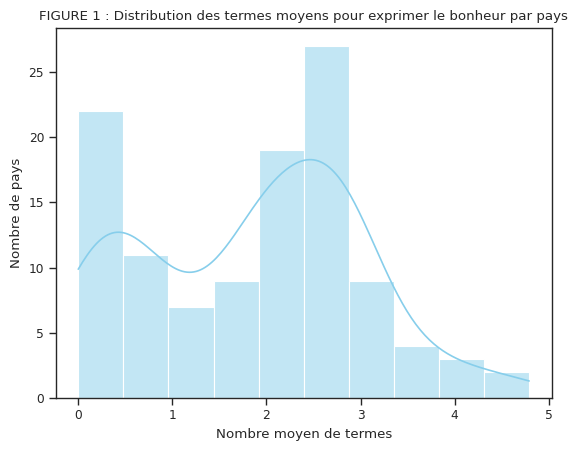

In [ ]:
# Distribution des termes moyens par pays
sns.histplot(dernier_df["Average_Number_of_Terms"], bins=10, kde=True, color="skyblue")

# choix d'affichage
plt.title("FIGURE 1 : Distribution des termes moyens pour exprimer le bonheur par pays")
plt.xlabel("Nombre moyen de termes")
plt.ylabel("Nombre de pays")
plt.show()


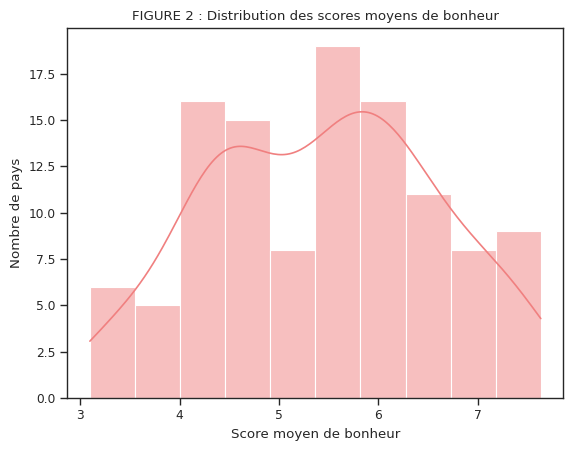

In [ ]:
# Distribution du score moyen de bonheur par pays
sns.histplot(dernier_df["Average Happiness Score (2013-2023)"], bins=10, kde=True, color="lightcoral")

# choix d'affichage
plt.title("FIGURE 2 : Distribution des scores moyens de bonheur")
plt.xlabel("Score moyen de bonheur")
plt.ylabel("Nombre de pays")
plt.show()


## **4.2. Graphes bivariés**

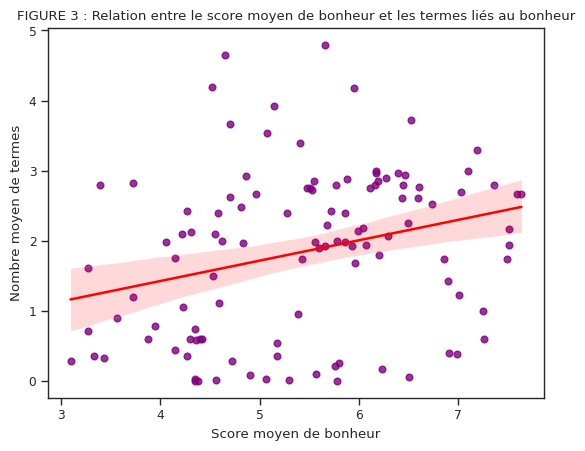

In [ ]:
# On crée un scatter plot avec une droite de régression
sns.regplot(
    x=dernier_df["Average Happiness Score (2013-2023)"], # choix des variables
    y=dernier_df["Average_Number_of_Terms"],  # choix des variables
    scatter_kws={'color': 'purple'},  # Couleur des points
    line_kws={'color': 'red'},  # Couleur de la droite de régression
)

# On met en forme l'affichage
plt.title("FIGURE 3 : Relation entre le score moyen de bonheur et les termes liés au bonheur")
plt.xlabel("Score moyen de bonheur")
plt.ylabel("Nombre moyen de termes")
plt.show()


## **4.3. Description des graphiques**


La distribution du nombre moyen de termes utilisés pour exprimer le bonheur **(voir Figure 1)** montre une variabilité entre 0 et 5. La majorité des pays se concentrent autour de valeurs inférieures à 3, suggérant que, dans la plupart des cas, le vocabulaire relatif au bonheur reste limité.

La distribution des scores moyens de bonheur par pays **(voir Figure 2)** s’étend de 3 à 7. Cette plage relativement restreinte s’explique par le fait qu’il s’agit de moyennes calculées sur une période de dix ans, ce qui réduit les variations extrêmes et donne une représentation plus stable des tendances générales.

La relation entre le score moyen de bonheur et le nombre moyen de termes pour exprimer le bonheur est présentée dans **la Figure 3**. Une droite de régression affine avec un coefficient positif est visible, ce qui indique une tendance selon laquelle les pays avec un score moyen de bonheur plus élevé tendent à avoir un vocabulaire légèrement plus riche pour exprimer le concept de bonheur. **Cependant, pour évaluer la significativité statistique de cette observation, on effectue un test de corrélation de Pearson.**

# **5. DATA MODELLING**

In [ ]:
# On calcule le coefficient de corrélation entre le score moyen de bonheur et le nombre moyen de termes pondéré
correlation, p_value = pearsonr(
    dernier_df["Average Happiness Score (2013-2023)"],  # choix des variables
    dernier_df["Average_Number_of_Terms"]  # choix des variables
)

# On affiche le résultat
# On affiche le coefficient de corrélation, qui varie entre -1 (corrélation négative parfaite) et 1 (corrélation positive parfaite).
# On affiche la valeur p, qui permet de tester si la corrélation observée est significative ou due au hasard.
print(f"Coefficient de corrélation de Pearson : {correlation}")
print(f"Valeur p : {p_value}")


Coefficient de corrélation de Pearson : 0.2807503307804738
Valeur p : 0.002594829590913827


# **6. CONCLUSION**

Ainsi, nos résultats montrent **une corrélation modérée et statistiquement significative** (coefficient de Pearson = 0,2807, p = 0,0026 < 0.05) entre le score moyen de bonheur d’un pays et le nombre moyen de termes distincts associés au concept de bonheur. Autrement dit, **les pays avec des scores de bonheur plus élevés semblent avoir un vocabulaire légèrement plus riche pour exprimer le bonheur**. Cependant, **cette relation reste limitée et ne permet pas de tirer des conclusions définitives**.




☹ **LIMITES DE NOTRE ETUDE** ☹

**1. Etude corrélationnelle**

Il est important de souligner que **cette étude est de nature corrélationnelle**.Elle ne permet donc **pas d'établir un lien de causalité direct entre la richesse lexicale du concept de "bonheur" et les niveaux de bonheur.** En d'autres termes, la présence de plusieurs termes pour désigner le bonheur ne prouve pas que ces termes influencent directement les niveaux de bonheur des populations, ni que le bonheur d'une société favorise l'enrichissement de son vocabulaire.

De plus, **d'autres facteurs non pris en compte dans notre analyse**, comme des éléments culturels, historiques ou sociaux, pourraient éclairer davantage cette relation. Des recherches futures pourraient explorer ces dimensions pour mieux comprendre l'interaction entre le lexique et les indices de bien-être social.

**2. Données linguistiques limitées**

- **Lexibank ne couvre pas toutes les langues du monde**, ce qui pourrait omettre des langues ou dialectes importants pour certains pays.
- **Lexibank ne garantit pas une exhaustivité parfaite pour les mots liés au bonheu**r, ce qui peut sous-estimer la diversité lexicale.

**3. Choix des coefficients de pondération**

**Les coefficients attribués aux langues parlées par pays ont été déterminés à partir de ressources en ligne (notamment Wikipédia) et à la main**, une méthode pratique mais simplificatrice. Cela pourrait introduire des biais dans les résultats.

